# ARIMA model
## Best for time series, 
AR- AutoRegressive dependent relationship between observation and some lagged observations(p)
I- Integrated used for differencing raw observation/. subtracting one observations from another from previous timestamps to make time series stationary(d)
MA- Moving Average dependency between an observation and residual erros from a moving average model applied to lagged observations
It takes account in past values to predict future values 

What does lagged mean in time series?
Lagging a time series means to shift its values forward one or more time steps, or equivalently, to shift the times in its index backward one or more steps.

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
data=pd.read_excel('../DATA/AAPLStocks.xlsx')
data.drop('Unnamed: 0', axis=1, inplace=True)
data['date']= pd.to_datetime(data[['Year', 'month','day']])
data.set_index('date', inplace=True)
data.drop(['Year', 'month','day'], axis=1,inplace=True)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
1998-01-26,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0
1998-01-27,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0
1998-01-28,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0
1998-01-29,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0
1998-01-30,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0
...,...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0
2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0
2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0


### Since we want to predict the price we should only select the close column and create new dataframe

In [4]:
df=data[['Close']].copy()
df

,Close
date,
1998-01-26,0.147936
1998-01-27,0.145558
1998-01-28,0.146034
1998-01-29,0.140802
1998-01-30,0.139374
...,...
2023-01-19,135.270004
2023-01-20,137.869995
2023-01-23,141.110001


In [5]:
df.describe()

,Close
count,6292.000000
mean,26.828094
std,42.312058
min,0.134617
25%,0.789390
50%,7.915763
75%,28.689248
max,180.959732


<AxesSubplot:xlabel='date'>

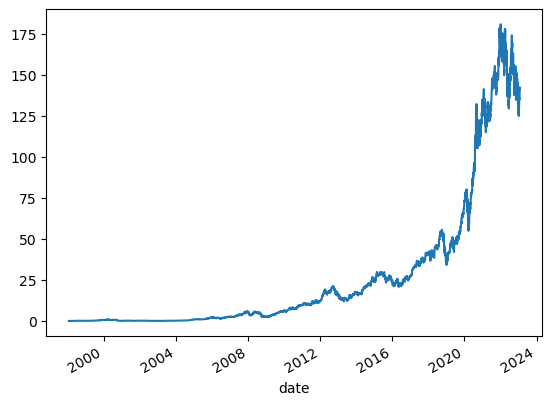

In [6]:
df.Close.plot()

### Stationary Time Series

A stationary time series has statistical properties or moments (e.g., mean and variance) that do not vary in time. 

# We can see how time series can be stationary by ADF test
# Adf tries to prove null hypotheis wrong
### null hypothesis: not stationary (p-value>0.05)
### alternate hypothesis:stationary
### pvalue>0.05 we need to find order of inferencing

In [7]:
from statsmodels.tsa.stattools import adfuller
result= adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: 1.3528862625208233
p-value: 0.9968892392242414


In [8]:
## order of differencing

d=0 if its stationary

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

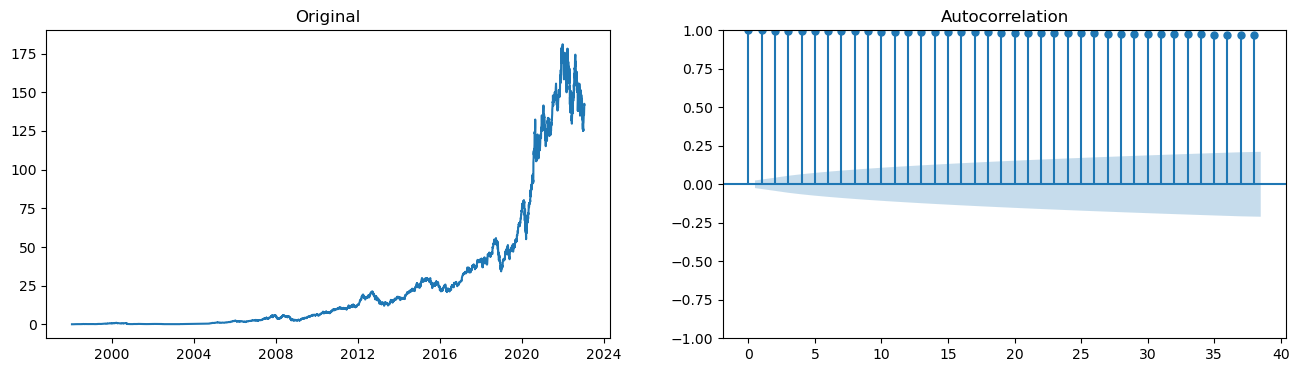

In [10]:
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close,ax=ax2);

In [11]:
diff=df.Close.diff().dropna()

In [12]:
diff

date
1998-01-27   -0.002378
1998-01-28    0.000476
1998-01-29   -0.005232
1998-01-30   -0.001428
1998-02-02   -0.004756
                ...   
2023-01-19    0.059998
2023-01-20    2.599991
2023-01-23    3.240005
2023-01-24    1.419998
2023-01-25   -0.669998
Name: Close, Length: 6291, dtype: float64

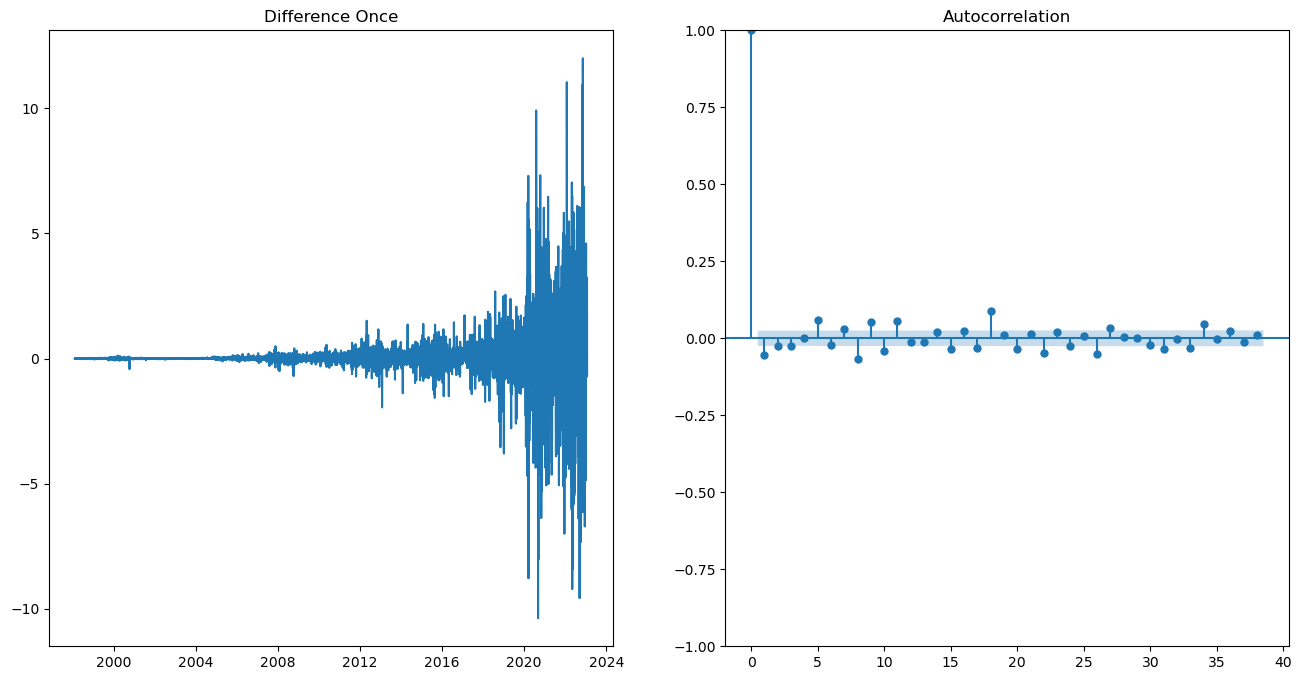

In [13]:
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Once')
plot_acf(diff,ax=ax2);


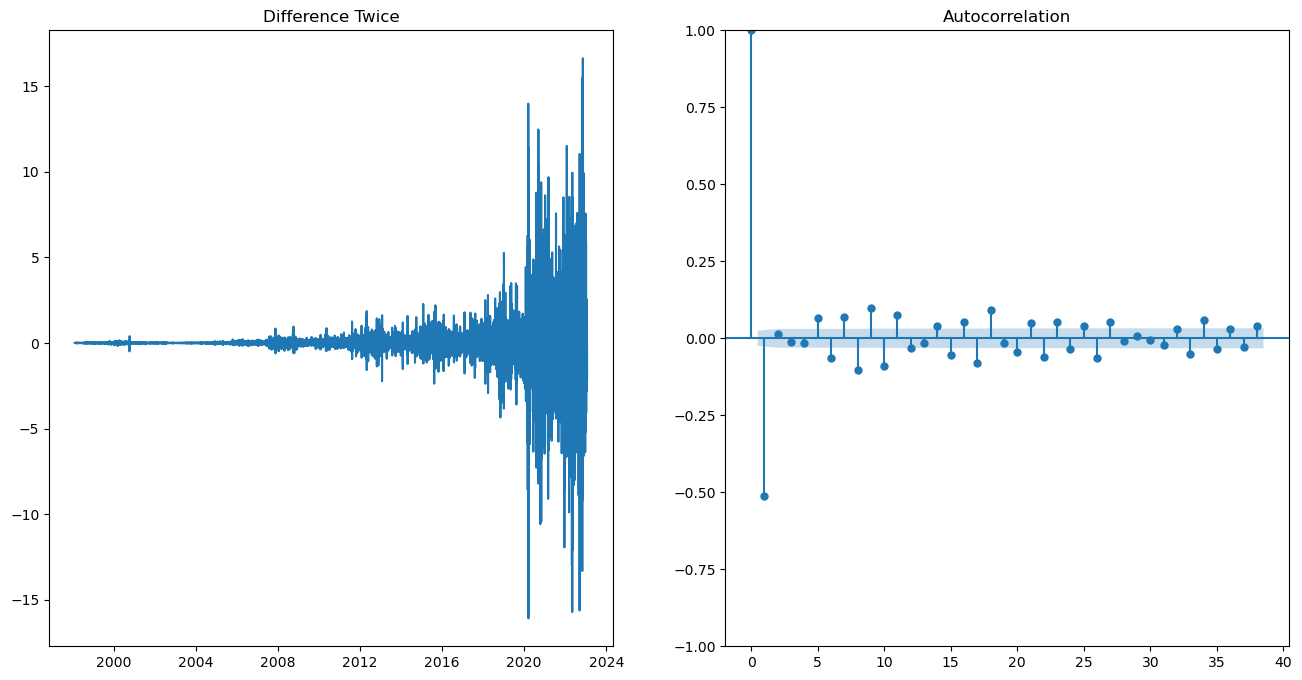

In [14]:
diff=df.Close.diff().diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Twice')
plot_acf(diff,ax=ax2);


the lag in 2nd plt shows that second lag has gone more to neagtive which indicates that it migh have overdifference so we use 1. (n=1)

In [93]:
!pip install pmdarima

In [15]:
from pmdarima.arima.utils import ndiffs

In [16]:
ndiffs(df.Close,test='adf')

1

Finding p (it's the ordr of auto regressive term.) It refers to number of lags to be used as a predictors. Auto Regressor term can be found by Partial corelation (PACF plot)
           PACF plot showws the corelation between the series and the lags

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf


p refer to the number of lags to be used as a predictor.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


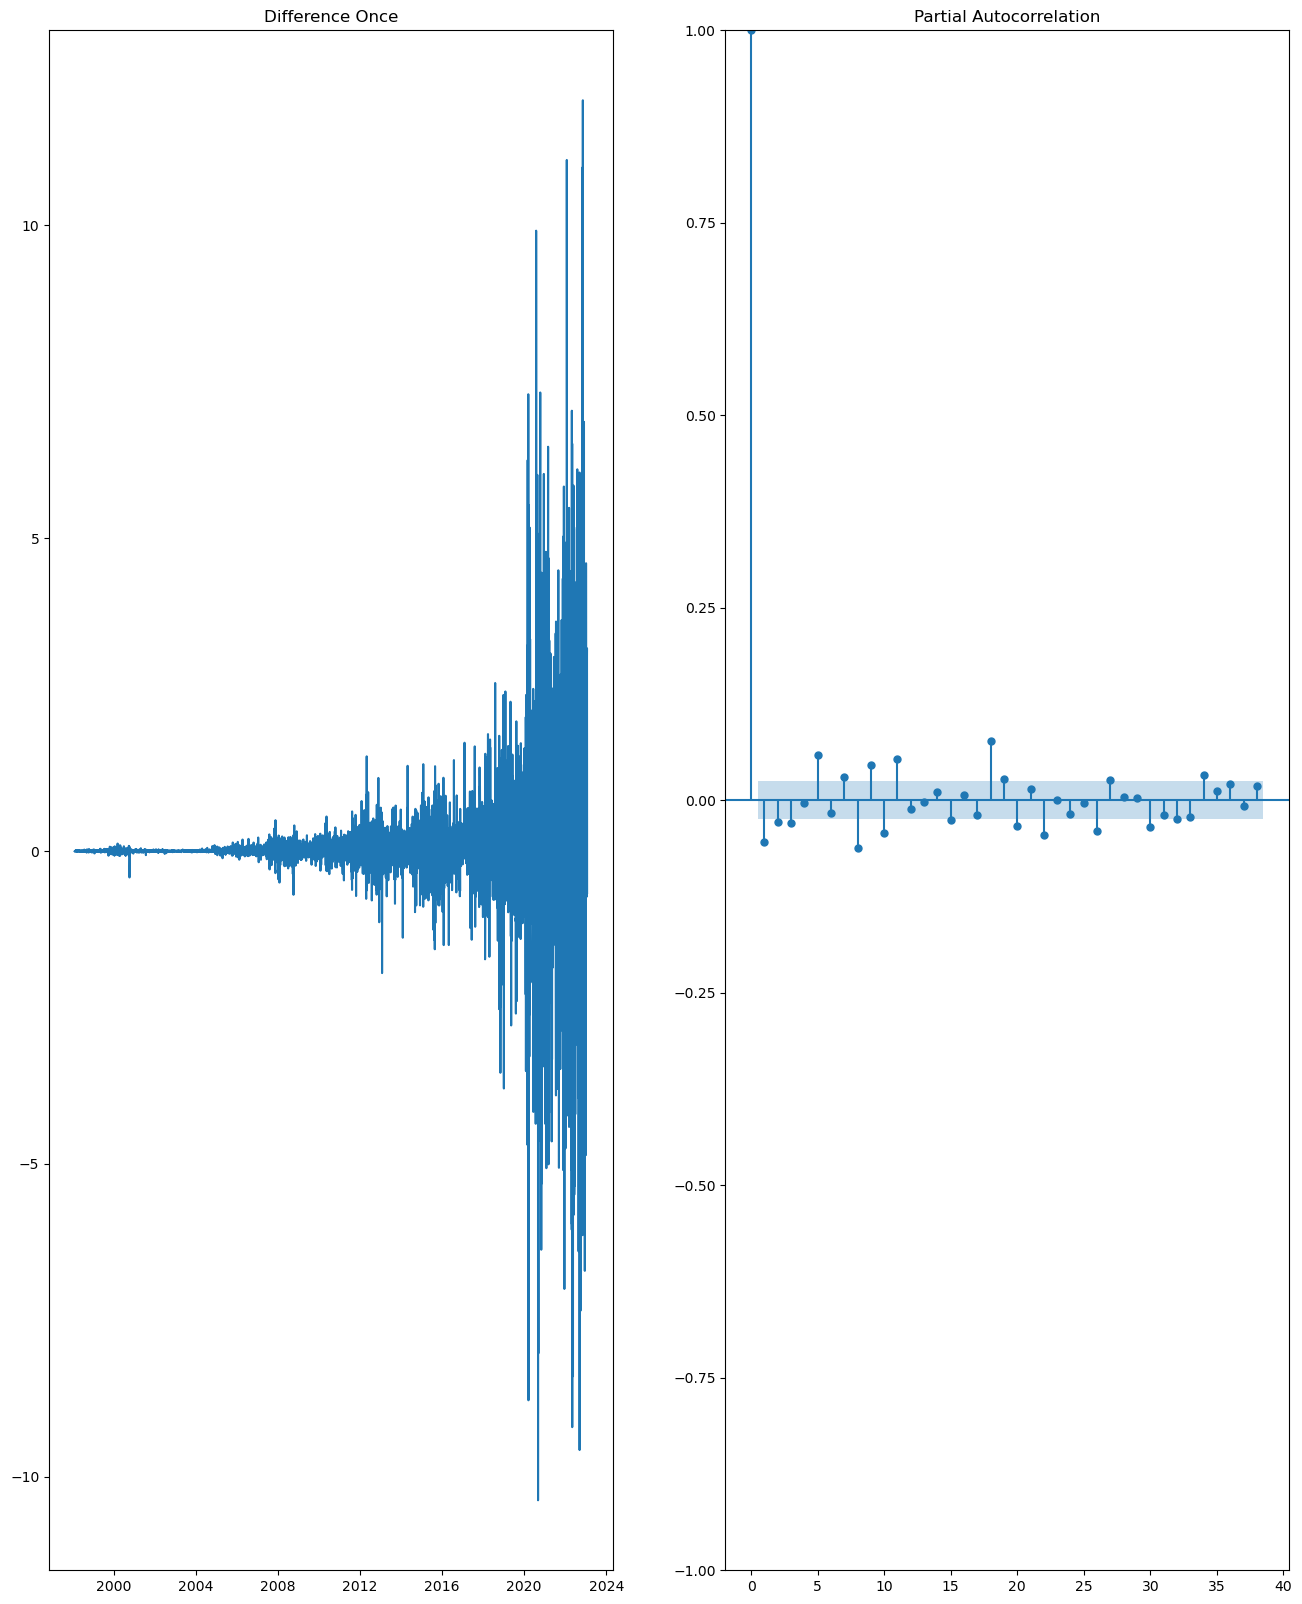

In [18]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,20))
ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

3 of the lags is above the significance line so we use p as 3 (p=3) and also after 3 values shuts-off towards zero

##### q refers to the moving average where it gives the lagged forecast errors that should go in the arima models

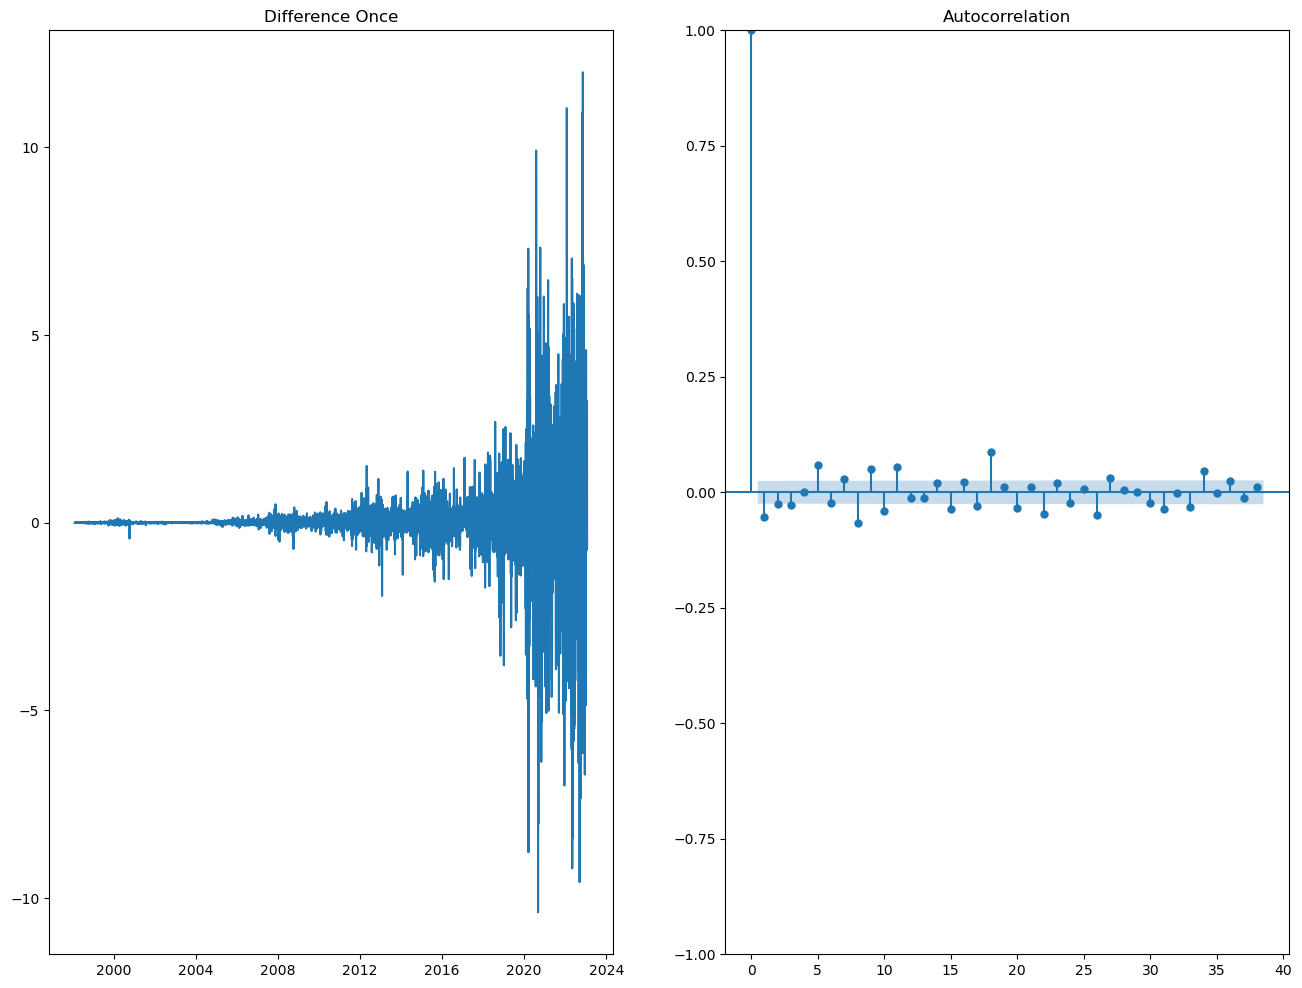

In [19]:
diff= df.Close.diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,12))
ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);


In [20]:
 #q might be 3 becasue the 3 of the lag is above the signifciance level and exponential decrease

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [75]:
model= ARIMA(df.Close,order=(3,1,3))
result= model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

In [29]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6291
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -8923.808
Date:                Sun, 12 Feb 2023   AIC                          17861.615
Time:                        16:30:54   BIC                          17908.842
Sample:                             0   HQIC                         17877.977
                               - 6291                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8864      0.006   -336.313      0.000      -1.897      -1.875
ar.L2         -1.0267      0.009   -110.155      0.000      -1.045      -1.008
ar.L3         -0.0256      0.005     -5.479      0.0

(array([3.000e+00, 9.000e+00, 3.700e+01, 1.090e+02, 5.157e+03, 8.360e+02,
        1.070e+02, 2.400e+01, 5.000e+00, 4.000e+00]),
 array([-10.66551577,  -8.48844875,  -6.31138173,  -4.13431471,
         -1.95724769,   0.21981933,   2.39688635,   4.57395337,
          6.75102039,   8.92808742,  11.10515444]),
 <BarContainer object of 10 artists>)

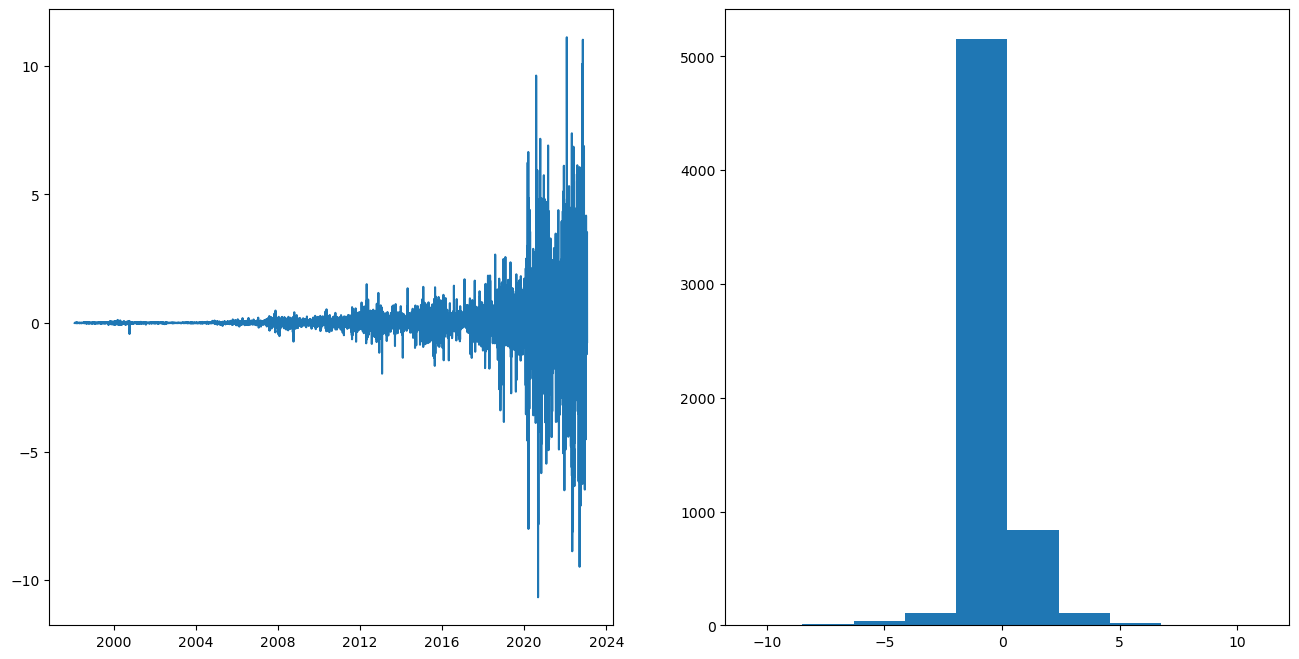

In [30]:
residuals= pd.DataFrame(result.resid)
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(residuals)
ax2.hist(residuals)

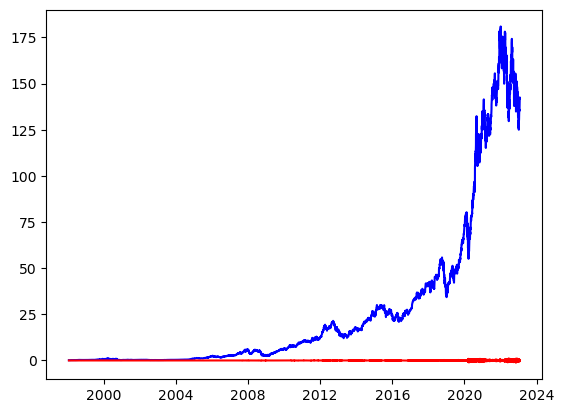

In [31]:
plt.plot(df.Close, color='blue', )
plt.plot(result.predict(), color='red')
plt.show()


In [32]:
model= ARIMA(df.Close, order=(3,1,2))
result= model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [33]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6292
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -8950.722
Date:                Sun, 12 Feb 2023   AIC                          17913.445
Time:                        15:27:58   BIC                          17953.926
Sample:                             0   HQIC                         17927.469
                               - 6292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3712      0.004     88.890      0.000       0.363       0.379
ar.L2         -0.9766      0.002   -521.538      0.000      -0.980      -0.973
ar.L3         -0.0516      0.004    -12.312      0.0

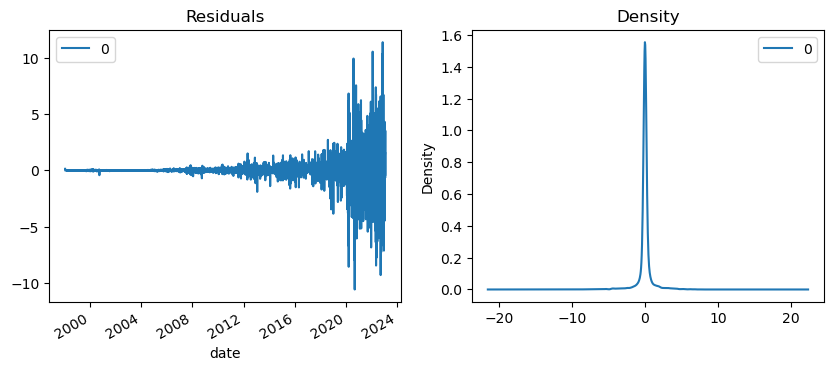

In [34]:
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2, figsize=(10,4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

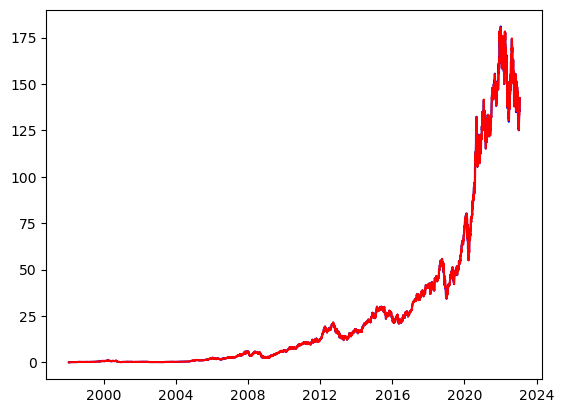

In [35]:
plt.plot(df.Close, color='blue', )
plt.plot(result.predict(dynamic=False), color='red')
plt.show()

In [36]:
df.Close.value_counts()

0.273992      8
0.353906      7
0.267332      7
0.296824      7
0.220716      6
             ..
2.733522      1
2.987724      1
2.955150      1
3.047394      1
141.860001    1
Name: Close, Length: 5681, dtype: int64

In [37]:
# Create Training and Test
train = df.Close[:4681]
test = df.Close[4681:]

In [43]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [39]:

model = pm.auto_arima(df.Close, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17948.927, Time=5.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17970.357, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17953.839, Time=0.87 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17952.725, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17971.492, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17950.341, Time=4.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17950.428, Time=4.54 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17949.749, Time=1.92 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=17950.802, Time=1.38 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17958.899, Time=14.46 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=17950.761, Time=1.12 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 35.719 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:     

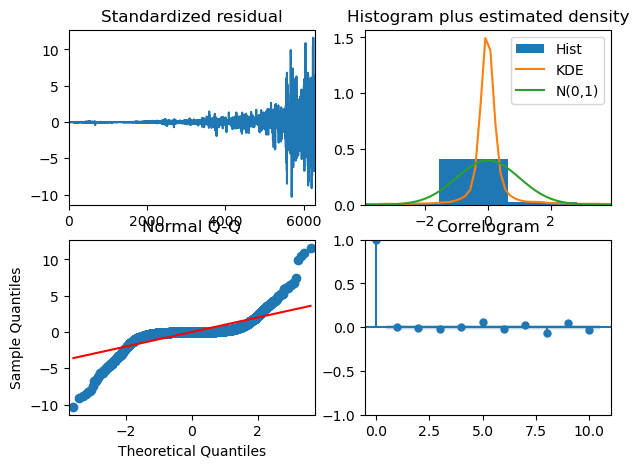

In [40]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [49]:
from statsmodels.tsa.arima.model import ARIMA


In [50]:
model= ARIMA(df.Close, order=(1,1,1))
result= model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [51]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6292
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8972.381
Date:                Sun, 12 Feb 2023   AIC                          17950.761
Time:                        15:34:14   BIC                          17971.002
Sample:                             0   HQIC                         17957.773
                               - 6292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3797      0.056      6.732      0.000       0.269       0.490
ma.L1         -0.4378      0.055     -7.914      0.000      -0.546      -0.329
sigma2         1.0146      0.005    211.917      0.0

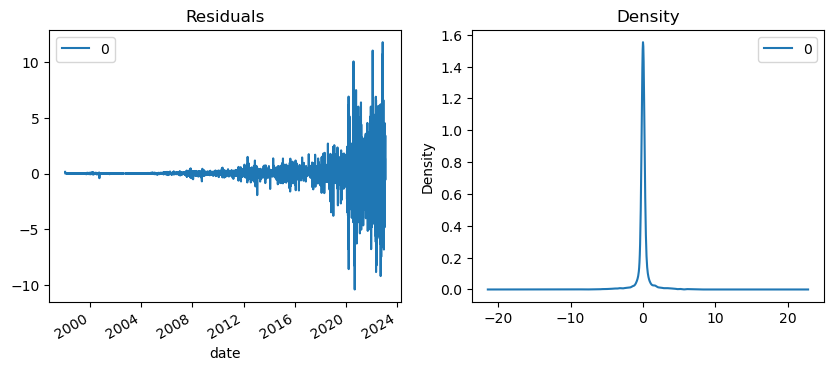

In [52]:
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2, figsize=(10,4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [53]:
residuals.describe()

,0
count,6292.000000
mean,0.024860
std,1.007007
min,-10.363360
25%,-0.049437
50%,0.002159
75%,0.085179
max,11.731302


In [60]:
!pip install pip install --upgrade statsmodels

     ---------------------------------------- 2.1/2.1 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 3.9 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\User\anaconda3\python.exe -m pip install pip install --upgrade statsmodels


In [63]:
import statsmodels.api as sm

In [64]:
model=sm.tsa.statespace.SARIMAX(df.Close,order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

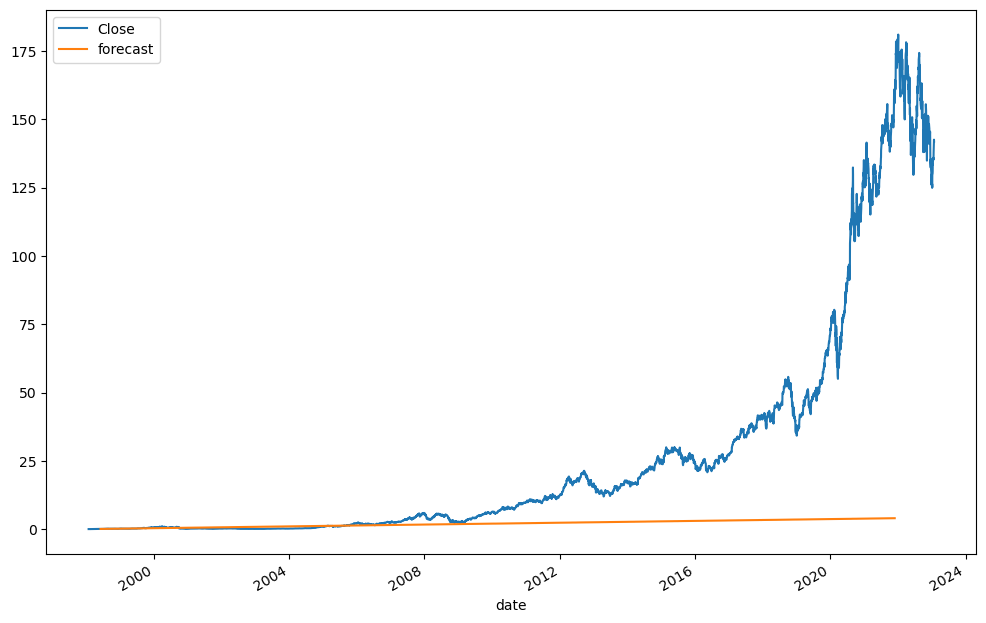

In [68]:
df['forecast']=results.predict(start=90,end=6000,dynamic=True)
df[['Close','forecast']].plot(figsize=(12,8))

Check between 2020 to 2023

In [70]:
new_df=data.loc[data['Close']>72,'Close']

In [74]:
new=pd.DataFrame(new_df)

<AxesSubplot:xlabel='date'>

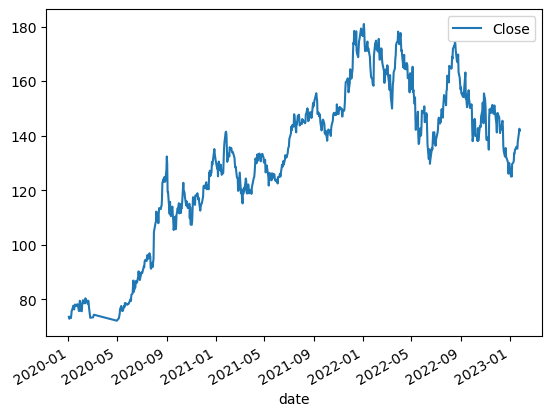

In [75]:
new.plot()

In [76]:
new.describe()

,Close
count,726.000000
mean,133.412135
std,26.738649
min,72.128098
25%,119.479626
50%,137.096825
75%,150.535690
max,180.959732


First check for stationarity if p value is greater than 0.05 its not stationary so we need to make it stationary

In [78]:
result= adfuller(new.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.2734364065324537
p-value: 0.18067841372940768


p value is higher so we consider that its not stationary so we need to make it stationary.

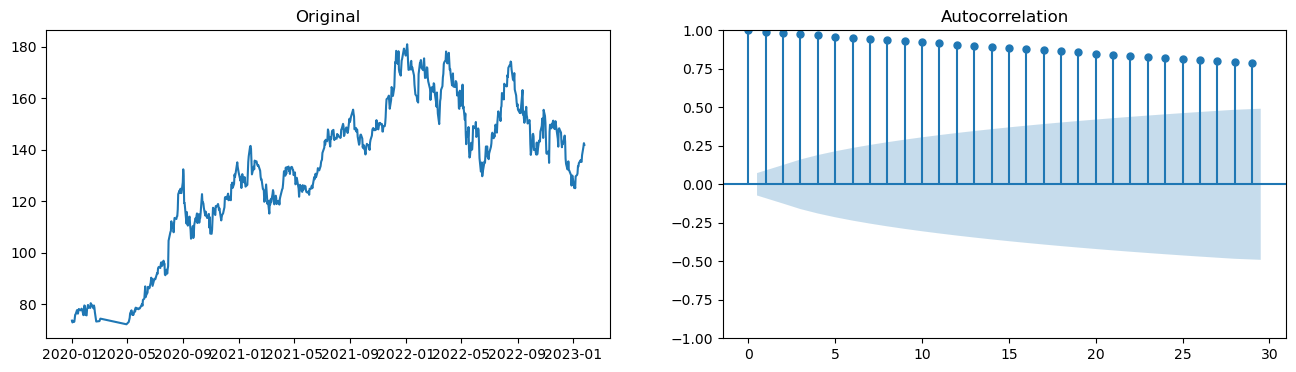

In [81]:
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,4))
ax1.plot(new.Close)
ax1.set_title('Original')
plot_acf(new.Close,ax=ax2);

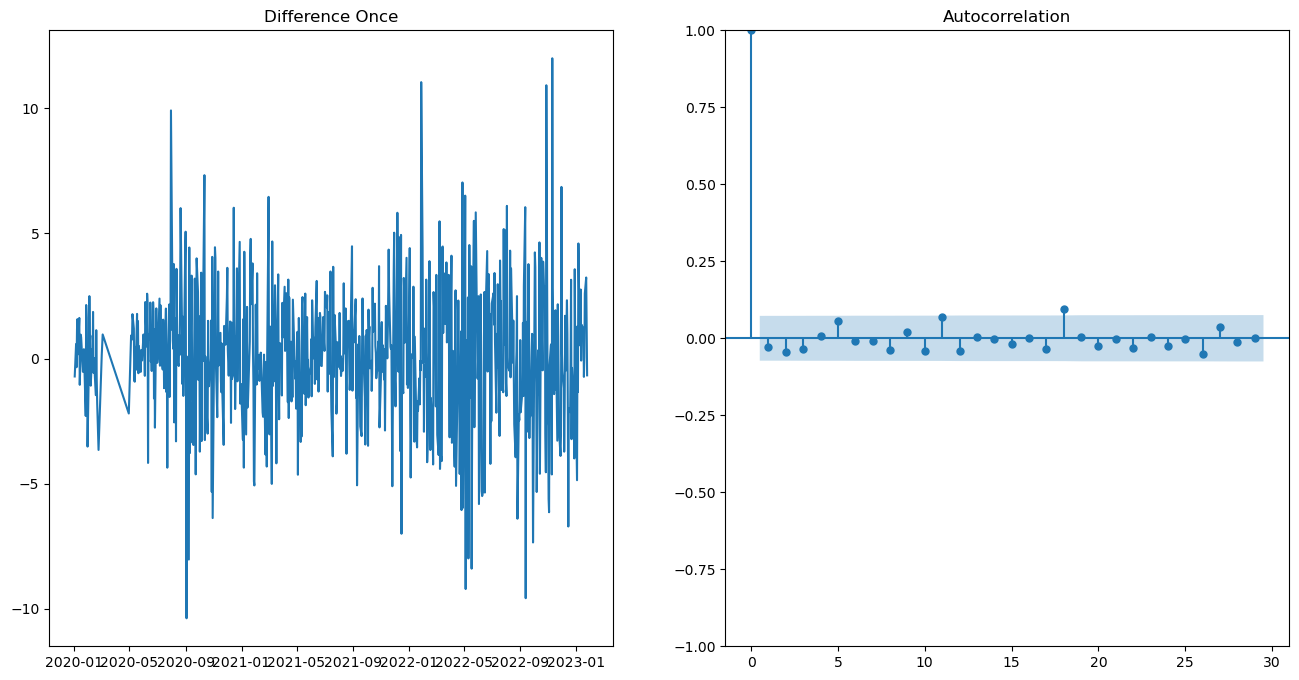

In [82]:
diff=new.Close.diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Once')
plot_acf(diff,ax=ax2);

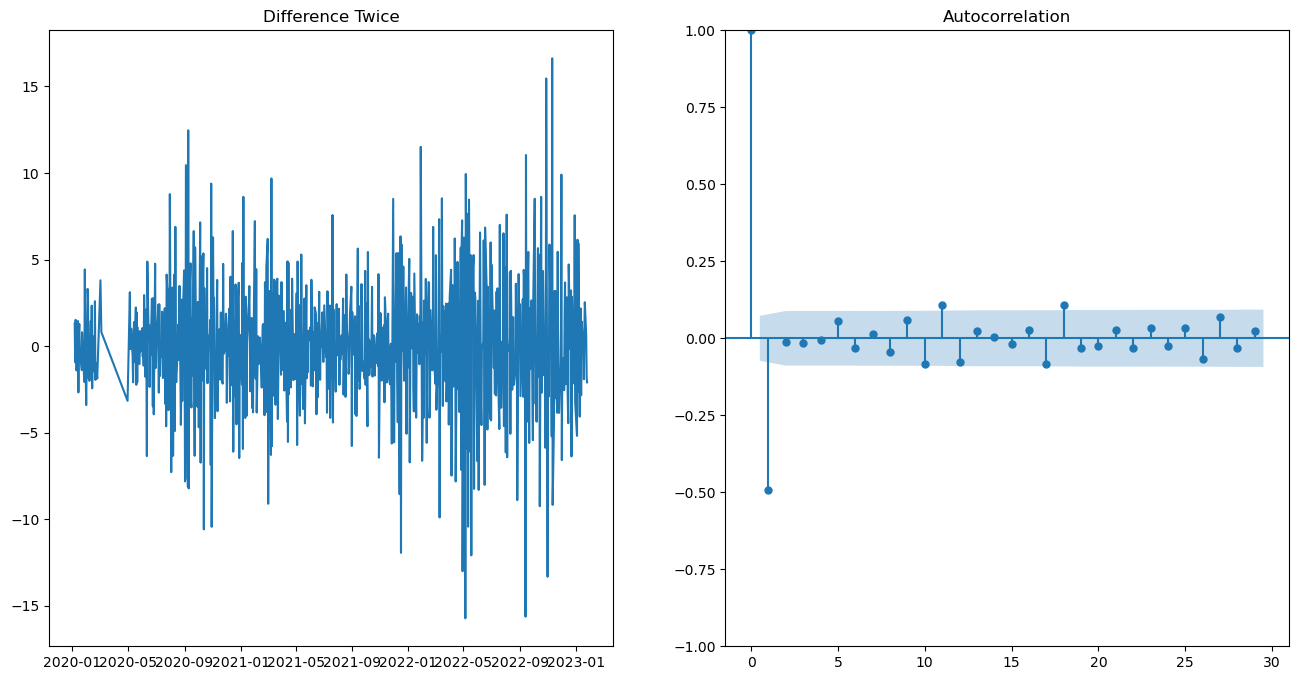

In [93]:
diff=new.Close.diff().diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Twice')
plot_acf(diff,ax=ax2);

the lag in 2nd plt shows that fist lag has gone more to neagtive which indicates that it migh have overdifference so we use 1 or zero . (n=1,0)

In [94]:
from pmdarima.arima.utils import ndiffs
ndiffs(df.Close,test='adf')

1

or, use ndiffs to find (d) from pmdarima

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


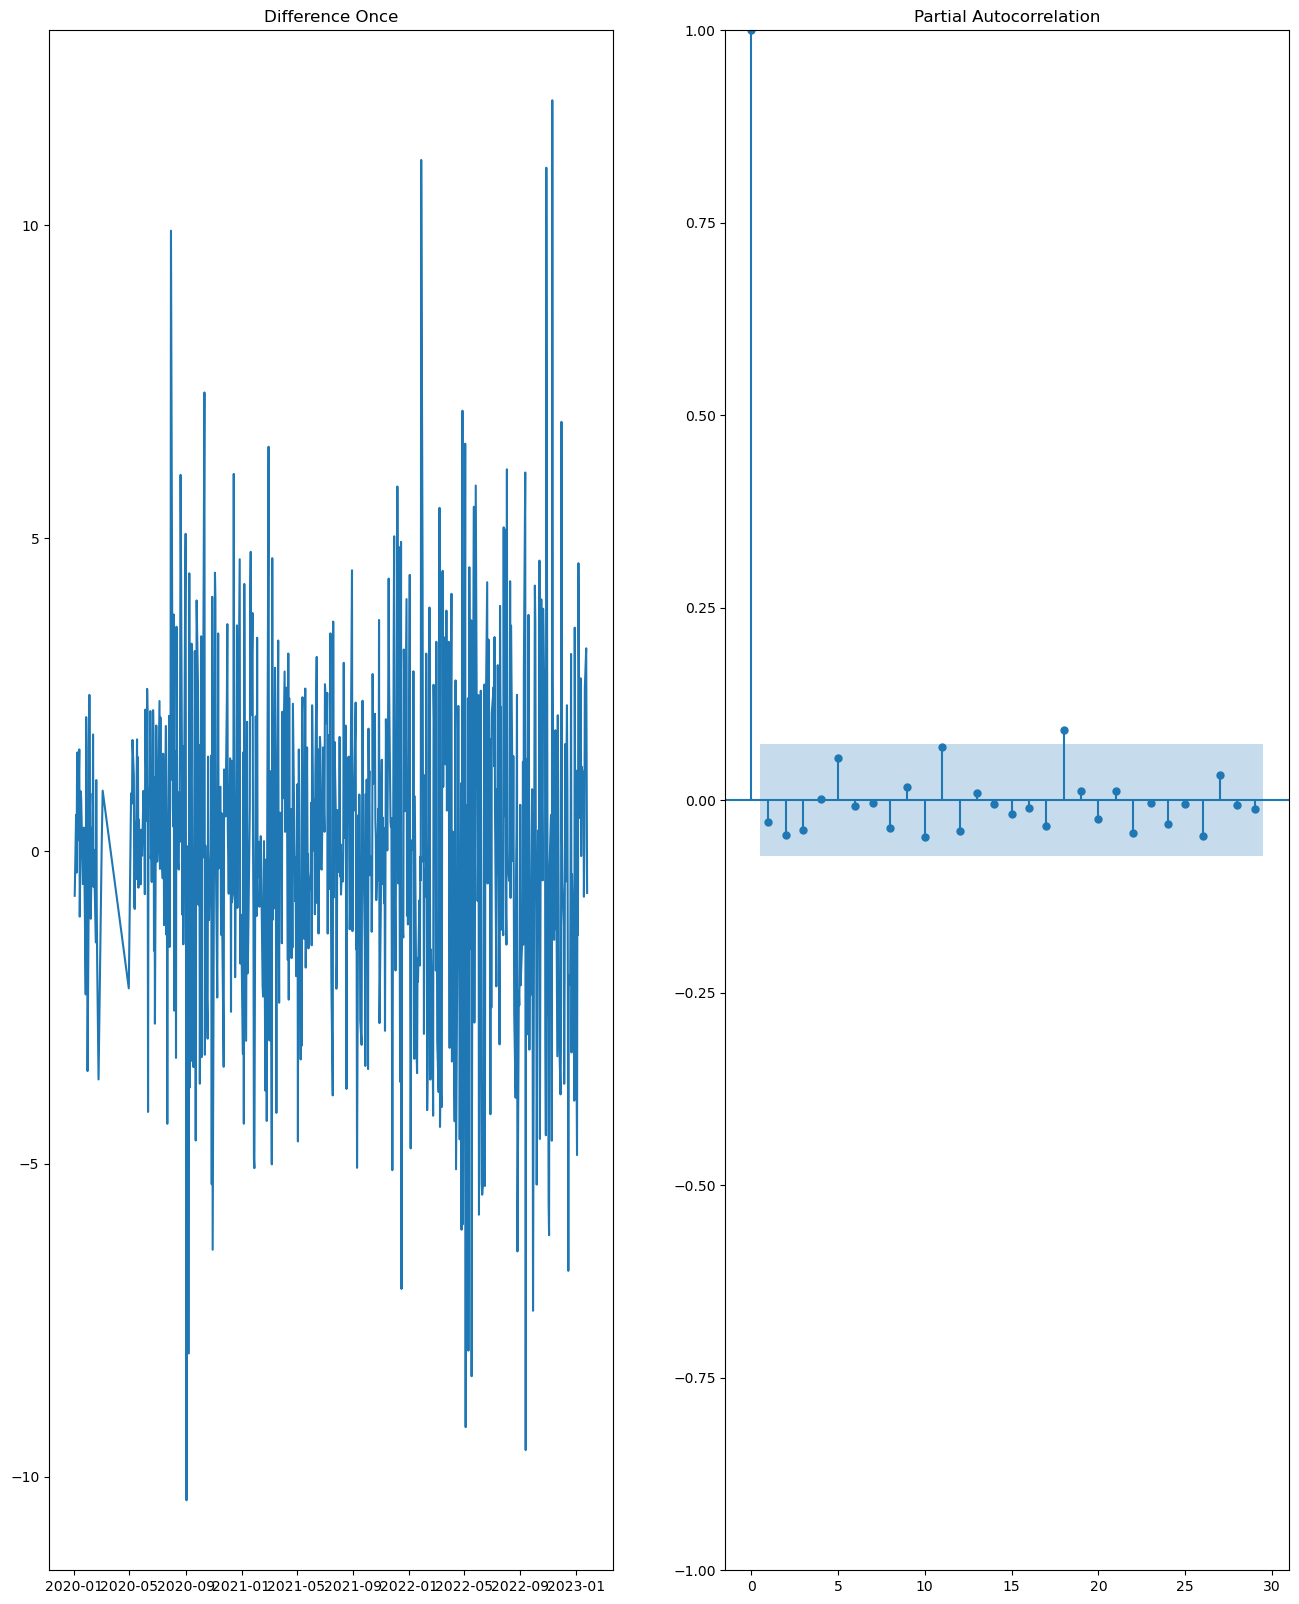

In [95]:
diff=new.Close.diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,20))
ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

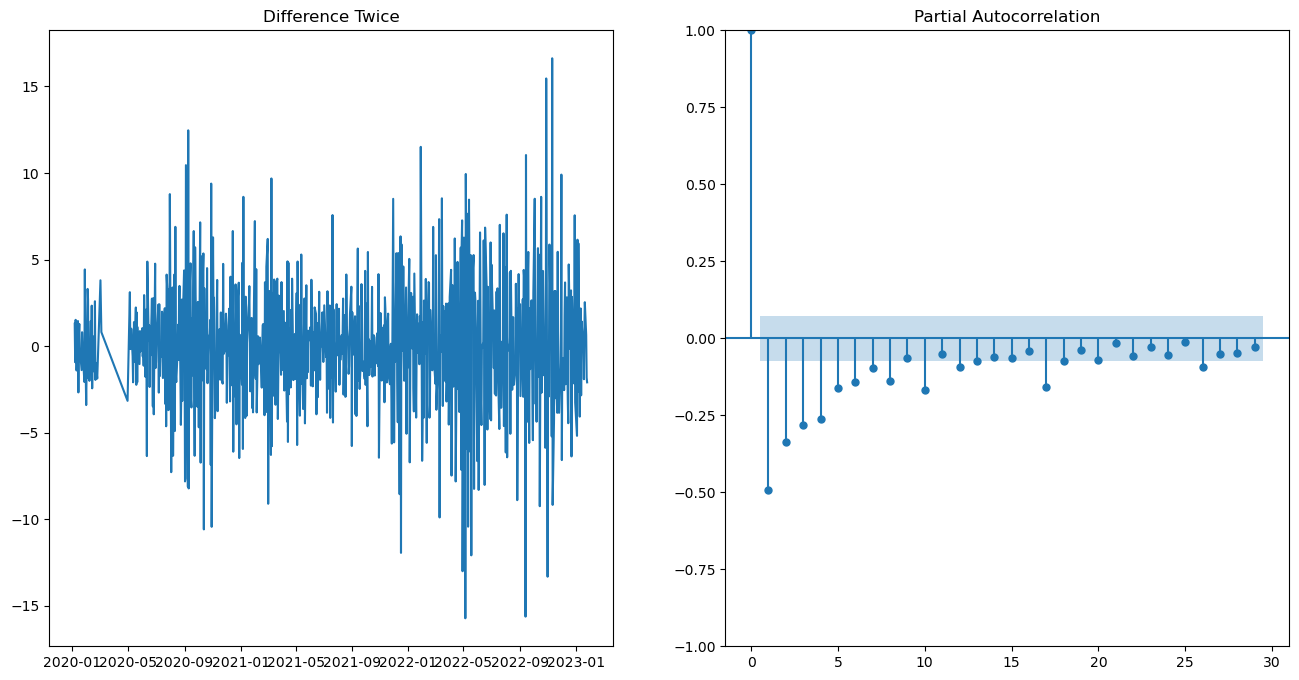

In [96]:
diff=new.Close.diff().diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Twice')
plot_pacf(diff,ax=ax2);

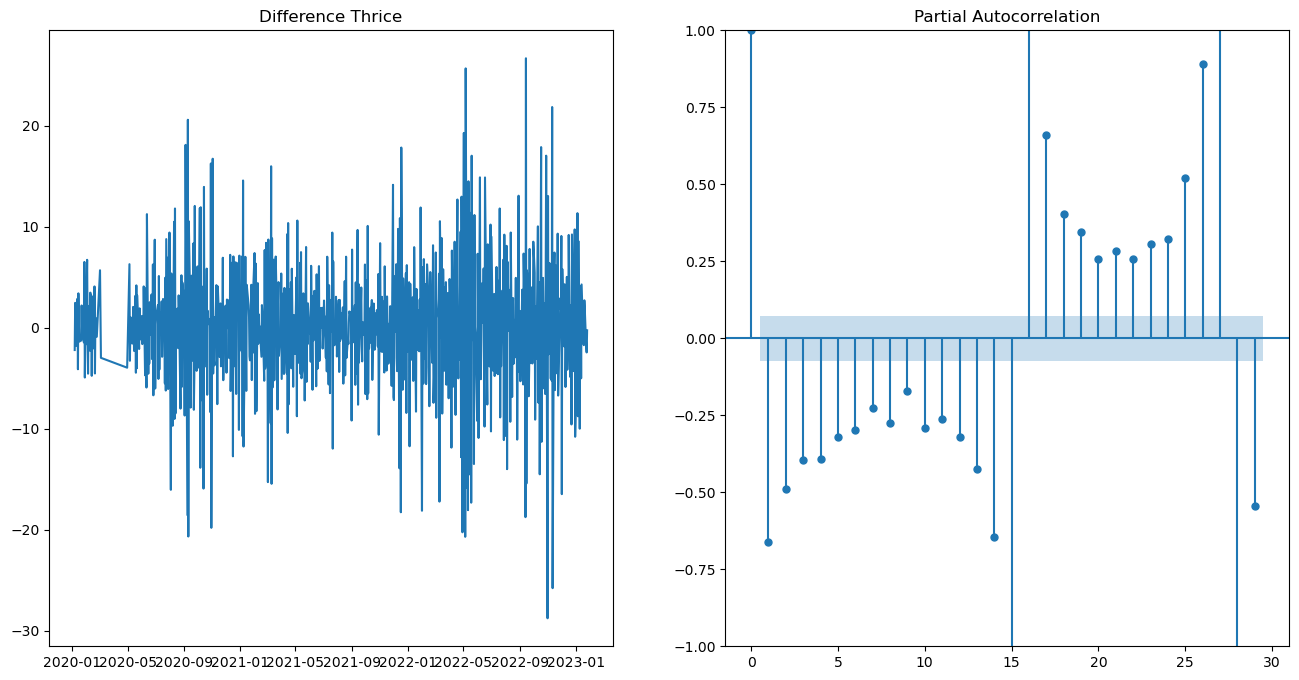

In [97]:
diff=new.Close.diff().diff().diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Thrice')
plot_pacf(diff,ax=ax2);

As we can see that after 3 lags the value shuts off towards zero so we might select p as 3

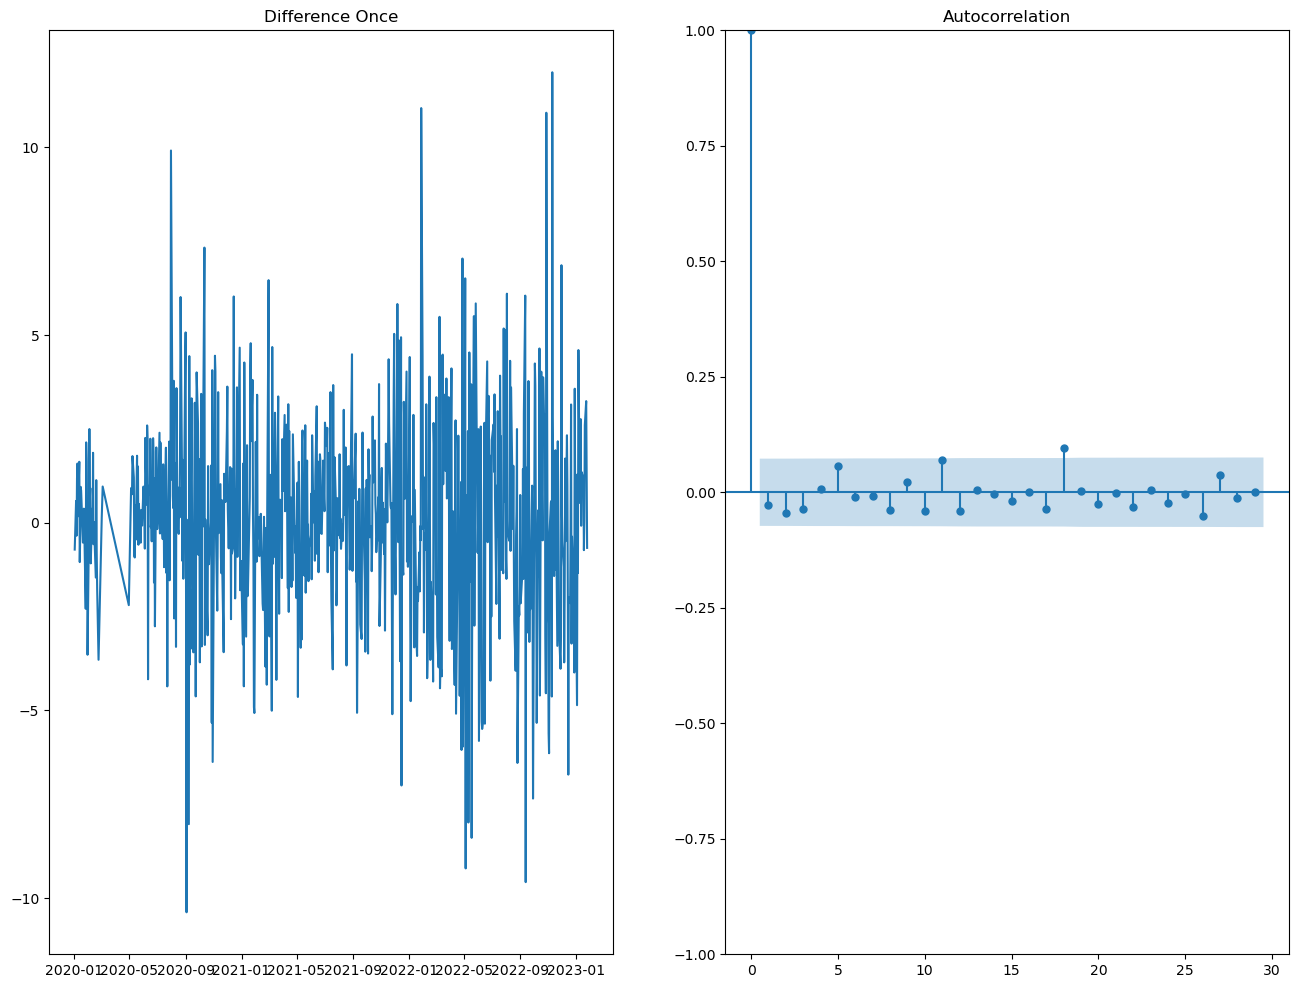

In [98]:
diff= new.Close.diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,12))
ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

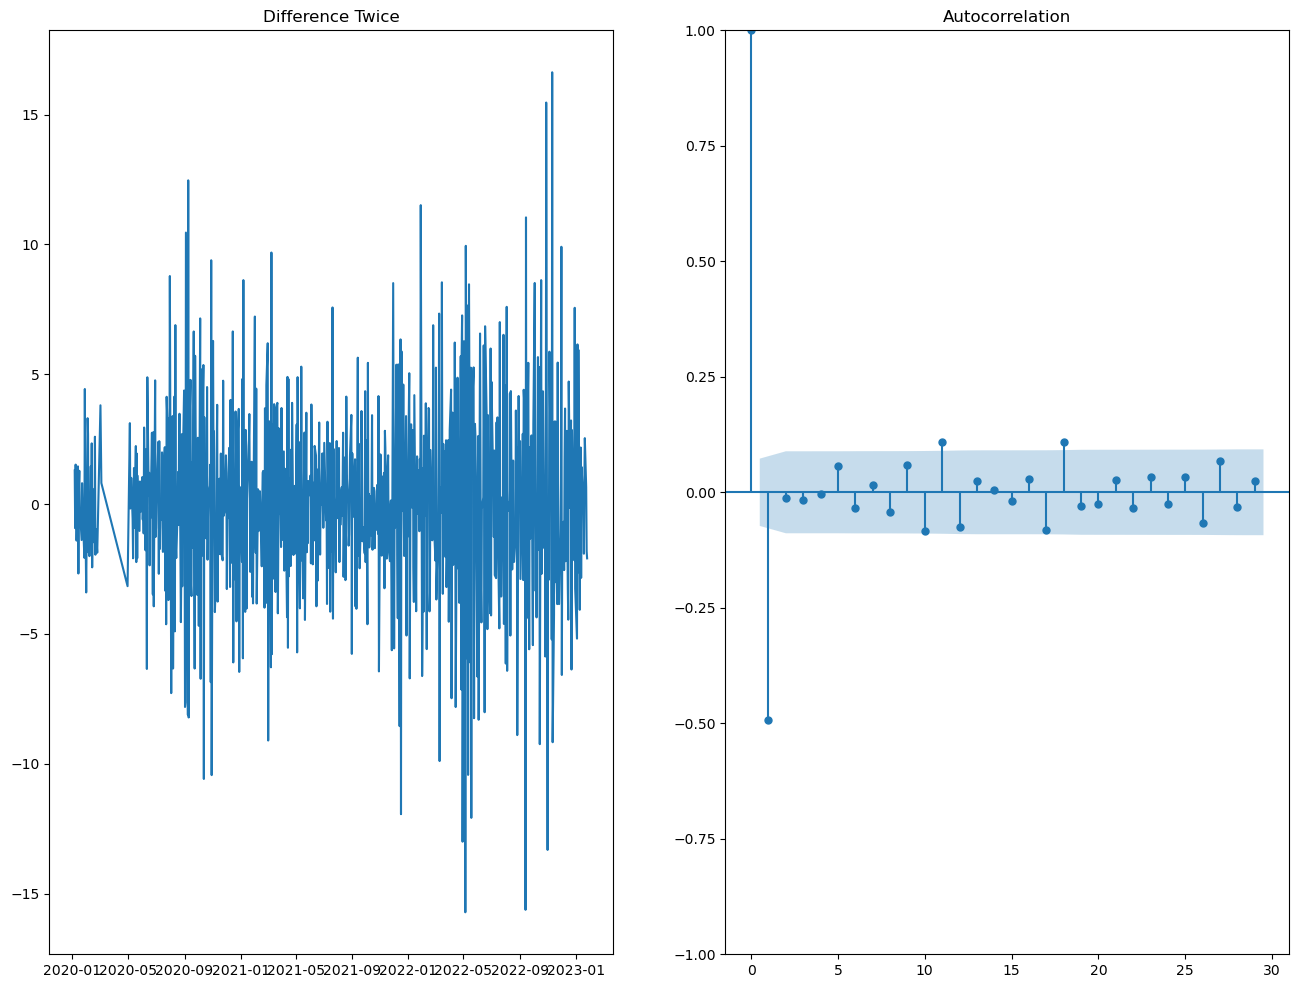

In [99]:
diff= new.Close.diff().diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,12))
ax1.plot(diff)
ax1.set_title('Difference Twice')
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

q might be 3 aswell because its going to zero exponetially after 3 lags

In [47]:
model= ARIMA(new.Close, order=(3,1,3))
result= model.fit()

NameError: name 'new' is not defined

In [144]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  726
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1753.101
Date:                Fri, 10 Feb 2023   AIC                           3520.202
Time:                        19:03:23   BIC                           3552.305
Sample:                             0   HQIC                          3532.591
                                - 726                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0294      0.255      0.115      0.908      -0.471       0.530
ar.L2          0.0710      0.182      0.389      0.697      -0.287       0.429
ar.L3         -0.7226      0.184     -3.936      0.0

(array([164., 556.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-9.82531562, -1.48663095,  6.85205372, 15.19073839, 23.52942305,
        31.86810772, 40.20679239, 48.54547706, 56.88416173, 65.2228464 ,
        73.56153107]),
 <BarContainer object of 10 artists>)

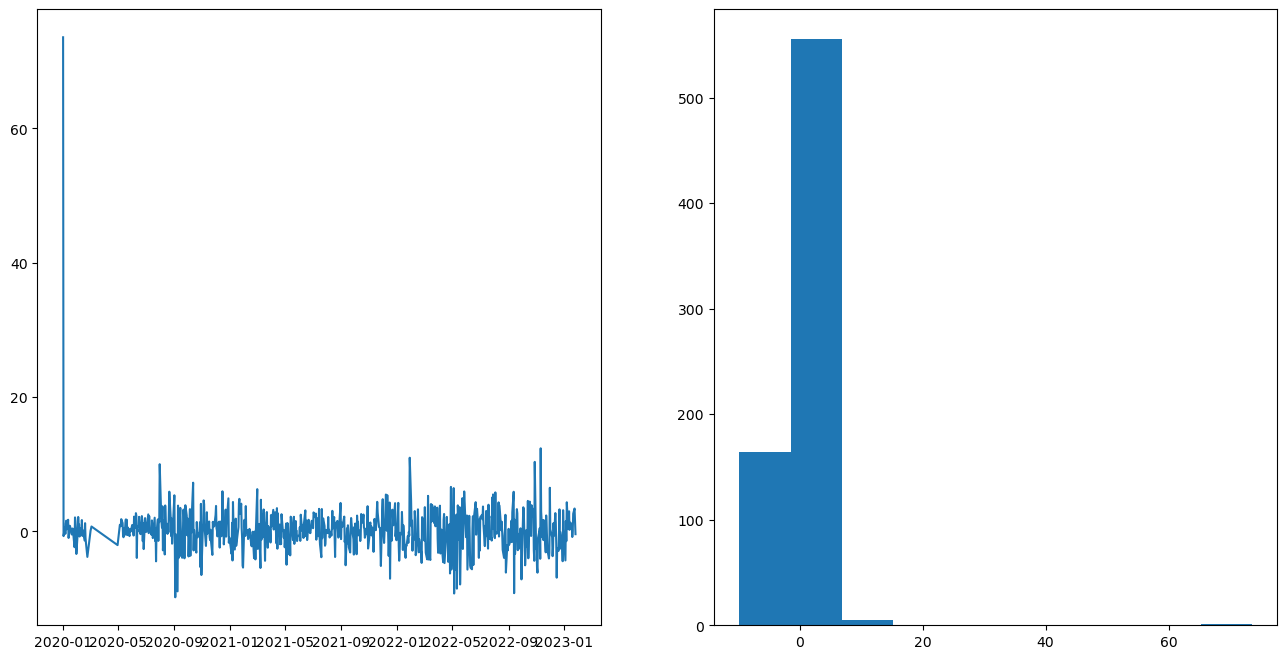

In [145]:
residuals= pd.DataFrame(result.resid)
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(residuals)
ax2.hist(residuals)

<AxesSubplot:xlabel='date'>

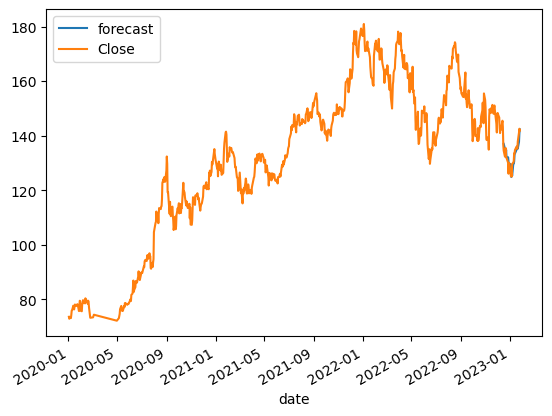

In [146]:
new['forecast']= result.predict(start=700, end=725)
new[['forecast','Close']].plot()

In [150]:
new.forecast.value_counts(dropna=False)

NaN           700
125.297886      1
140.923024      1
137.720469      1
135.253111      1
135.144442      1
136.058857      1
134.870265      1
133.449359      1
133.191825      1
130.513071      1
129.796921      1
129.833474      1
126.484936      1
136.990083      1
124.828398      1
129.404664      1
129.723709      1
126.470417      1
130.496511      1
132.073034      1
131.966599      1
134.834129      1
132.185052      1
132.472114      1
135.286186      1
142.289251      1
Name: forecast, dtype: int64

In [106]:

model = pm.auto_arima(new.Close, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3518.176, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3516.031, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3517.457, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3517.399, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3514.896, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.847 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  726
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1756.448
Date:                Fri, 10 Feb 2023   AIC                           3514.896
Time:                        16:59:36   BIC                           3519.482
Sample:                             0   HQIC                          3516.666
                                - 726                                       

In [152]:
new.drop('forecast', inplace=True, axis=1)

In [153]:
new

,Close
date,
2020-01-02,73.561531
2020-01-03,72.846390
2020-01-06,73.426811
2020-01-07,73.081497
2020-01-08,74.257103
...,...
2023-01-19,135.270004
2023-01-20,137.869995
2023-01-23,141.110001


In [46]:
model= ARIMA(new.Close, order=(0,1,0))
result= model.fit()

NameError: name 'new' is not defined

In [204]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  726
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1756.448
Date:                Fri, 10 Feb 2023   AIC                           3514.896
Time:                        20:12:14   BIC                           3519.482
Sample:                             0   HQIC                          3516.666
                                - 726                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.4446      0.291     25.625      0.000       6.875       8.014
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                80.26
Prob(Q):                              0.45   Pr

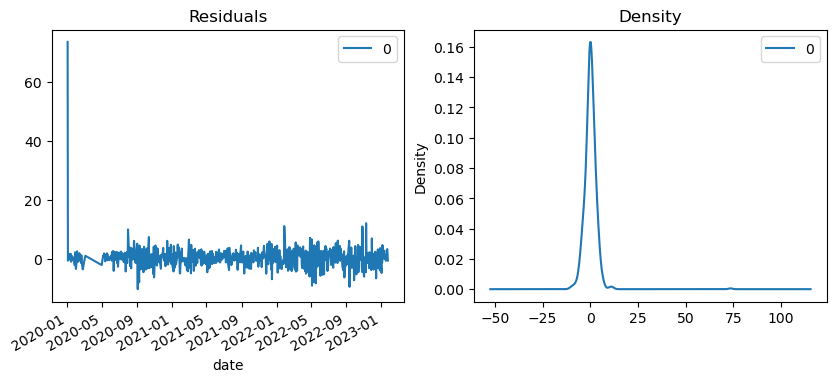

In [205]:
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2, figsize=(10,4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

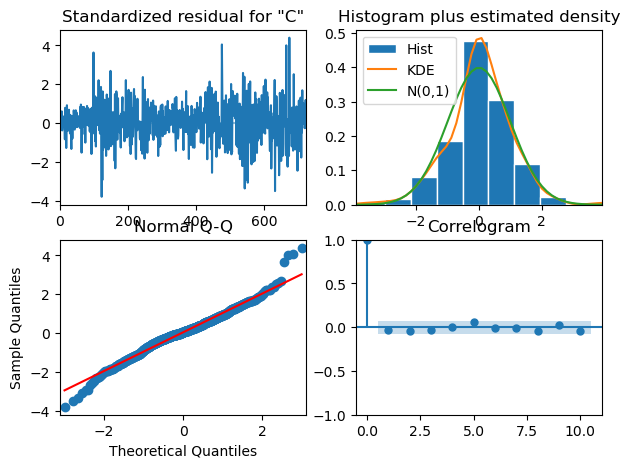

In [206]:
result.plot_diagnostics(figsize=(7,5))
plt.show()

In [207]:
residuals.describe()

,0
count,726.000000
mean,0.195399
std,3.856201
min,-10.377289
25%,-1.319904
50%,0.145733
75%,1.670675
max,73.561531


<AxesSubplot:xlabel='date'>

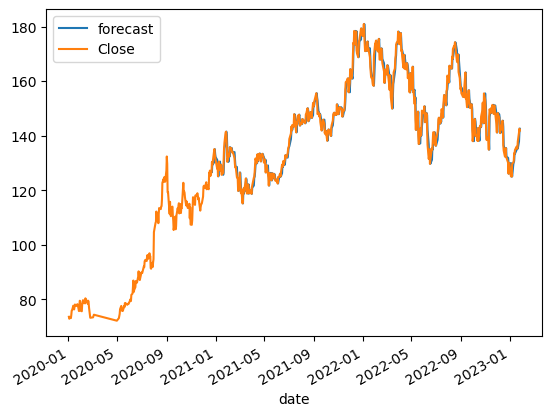

In [208]:
new['forecast']= result.predict(start=200, end=725, figsize=(10,12))
new[['forecast','Close']].plot()

In [209]:
new.drop('forecast',inplace=True, axis=1)

<AxesSubplot:xlabel='date'>

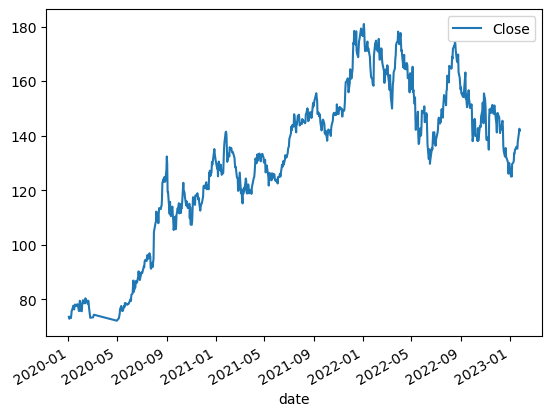

In [210]:
new.plot()

In [211]:
from pandas.tseries.offsets import DateOffset

In [212]:
future_dates= [new.index[-1]+DateOffset(months=x) for x in range (0,24)]

In [213]:
future_dataset_df= pd.DataFrame(index= future_dates[1:], columns=new.columns)

In [214]:
future_dataset_df

,Close
2023-02-25,NaN
2023-03-25,NaN
2023-04-25,NaN
2023-05-25,NaN
2023-06-25,NaN
2023-07-25,NaN
2023-08-25,NaN
2023-09-25,NaN
2023-10-25,NaN
2023-11-25,NaN


In [215]:
future_df= pd.concat([new,future_dataset_df])

In [216]:
future_df

,Close
2020-01-02,73.561531
2020-01-03,72.846390
2020-01-06,73.426811
2020-01-07,73.081497
2020-01-08,74.257103
...,...
2024-08-25,NaN
2024-09-25,NaN
2024-10-25,NaN
2024-11-25,NaN


<AxesSubplot:>

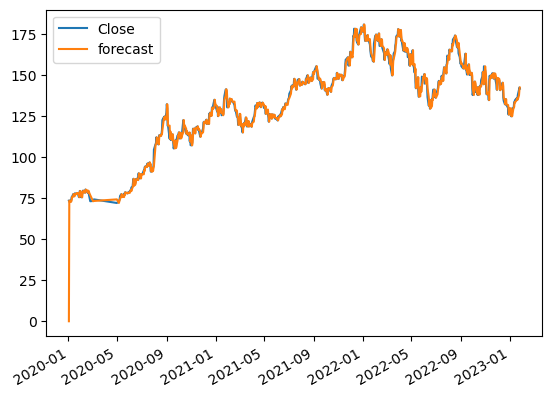

In [217]:
future_df['forecast']= result.predict()
future_df[['Close','forecast']].plot()

In [218]:
future_df.tail(724)

,Close,forecast
2020-02-07,78.567566,79.650238
2020-02-10,78.940727,78.567566
2020-02-11,78.464455,78.940727
2020-02-12,80.327827,78.464455
2020-02-13,79.755791,80.327827
...,...,...
2024-08-25,NaN,NaN
2024-09-25,NaN,NaN
2024-10-25,NaN,NaN
2024-11-25,NaN,NaN


In [219]:
new.tail(725)

,Close
date,
2020-01-03,72.846390
2020-01-06,73.426811
2020-01-07,73.081497
2020-01-08,74.257103
2020-01-09,75.834396
...,...
2023-01-19,135.270004
2023-01-20,137.869995
2023-01-23,141.110001


In [45]:
model_fit.plot_predict(dynamic=False)
plt.show()

NameError: name 'model_fit' is not defined